In [117]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
# PyTorch related imports would go here
import numpy as np

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
from us import states
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re

In [119]:
state_names = [state.name.lower() for state in states.STATES]
state_abbrs = [state.abbr for state in states.STATES]
city_df = pd.read_csv('PM25-Speciated/worldcities.csv')
city_names = city_df['city_ascii'].str.lower().tolist()  # First column
country_names = city_df['country'].str.lower().tolist()  # First column

In [120]:
stop_words = TfidfVectorizer(stop_words='english').get_stop_words()
stop_words = list(list(stop_words)+ city_names + country_names + state_names + state_abbrs)

# Original Data

In [121]:
DATASET_NAME = "SpeciateV5.3_PM_AE6.csv"

df = pd.read_csv('PM25-Speciated/specviate_v5_3datasets/'+DATASET_NAME, encoding='ISO-8859-1')

In [122]:
df

,Unnamed: 0,PROFILE_CODE,WEIGHT_PERCENT,UNCERTAINTY_PERCENT,SPECIES_NAME,SYMBOL,PROFILE_NAME,PROFILE_TYPE,TOTAL,REGION,CATEGORY_LEVEL_1_Generation_Mechanism,CATEGORY_LEVEL_2_Sector_Equipment,CATEGORY_LEVEL_3_.Fuel_Product
0,74033,3766AE6,0.001500,0.001200,Tin,Sn,Forest Fire - AE6,PM-AE6,100.0,Northwestern Colorado,Combustion,Biomass Burning; Wildfire,Pinyon-juniper
1,74034,3766AE6,0.079200,0.021300,Sulfur,S,Forest Fire - AE6,PM-AE6,100.0,Northwestern Colorado,Combustion,Biomass Burning; Wildfire,Pinyon-juniper
2,74035,3766AE6,0.133200,0.062900,Sulfate,SO4=,Forest Fire - AE6,PM-AE6,100.0,Northwestern Colorado,Combustion,Biomass Burning; Wildfire,Pinyon-juniper
3,74038,3766AE6,0.000100,0.000200,Vanadium,V,Forest Fire - AE6,PM-AE6,100.0,Northwestern Colorado,Combustion,Biomass Burning; Wildfire,Pinyon-juniper
4,74039,3766AE6,0.120300,0.095900,Potassium ion,K+,Forest Fire - AE6,PM-AE6,100.0,Northwestern Colorado,Combustion,Biomass Burning; Wildfire,Pinyon-juniper
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,347743,SUGP02,3.361345,0.504202,Sulfate,SO4=,Sugar Cane Pre-Harvest Burning Mexico,PM-AE6,100.0,"Mexico - Chiapas, Jalisco, Veracruz, and Morelos",Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane
4132,347745,SUGP02,0.168067,0.084034,Magnesium,Mg,Sugar Cane Pre-Harvest Burning Mexico,PM-AE6,100.0,"Mexico - Chiapas, Jalisco, Veracruz, and Morelos",Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane
4133,347747,SUGP02,0.168067,0.000000,Nitrate,NO3-,Sugar Cane Pre-Harvest Burning Mexico,PM-AE6,100.0,"Mexico - Chiapas, Jalisco, Veracruz, and Morelos",Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane
4134,347750,SUGP02,2.184874,0.420168,Ammonium,NH4+,Sugar Cane Pre-Harvest Burning Mexico,PM-AE6,100.0,"Mexico - Chiapas, Jalisco, Veracruz, and Morelos",Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane


In [123]:
df = df.pivot_table(index=['PROFILE_CODE', 'PROFILE_NAME'], columns='SPECIES_NAME', values='WEIGHT_PERCENT', aggfunc='first').reset_index()
# Fill NaN values with 0 (or any other value you prefer)
df = df.fillna(0)

In [124]:
df

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Selenium,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,3766AE6,Forest Fire - AE6,0.015400,0.110500,0.000500,0.000300,0.0,0.000100,0.369300,0.0,...,0.000000,0.062000,0.012200,0.0,0.133200,0.0792,0.001500,0.000100,0.002900,0.000000
1,5674,Marine Vessel - Main Engine - Heavy Fuel Oil,0.771625,0.000000,0.019000,0.000000,0.0,0.003958,0.259125,0.0,...,0.000000,0.000000,0.000000,0.0,38.032500,0.0000,0.013281,1.515625,0.018250,0.000000
2,5675AE6,Marine Vessel - Auxiliary Engine - Marine Gas ...,0.000000,0.000000,0.061466,0.000000,0.0,0.023641,1.912530,0.0,...,0.000000,0.340426,0.000000,0.0,12.078014,0.0000,0.035461,0.082742,0.200946,0.000000
3,8873AE6,Aircraft Exhaust,0.000000,1.791897,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.000000
4,8898a,Outdoor Hydronic Heater- one stage updraft con...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.017300,0.010700,0.0,0.044100,0.0147,0.000000,0.000000,0.007760,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,95870,Catalytic Woodstove Startup Wood Composite,0.000000,0.000000,0.001704,0.000111,0.0,0.006554,0.056238,0.0,...,0.000223,0.026435,0.045670,0.0,0.417652,0.0000,0.010290,0.000154,0.045448,0.000927
229,95871,Catalytic Woodstove Burn Phase Composite Birch,0.000000,0.000000,0.010937,0.000005,0.0,0.006001,0.024024,0.0,...,0.001240,0.101690,0.021691,0.0,1.906428,0.0000,0.008238,0.000311,0.183862,0.000196
230,95872,Catalytic Woodstove Burn Phase Composite Spruce,0.000355,0.000000,0.000725,0.000006,0.0,0.002385,0.043209,0.0,...,0.000117,0.001333,0.003175,0.0,0.359246,0.0000,0.001160,0.000060,0.032112,0.000267
231,95873,Catalytic Woodstove Burn Phase and Wood Composite,0.000149,0.000000,0.006648,0.000006,0.0,0.004483,0.032082,0.0,...,0.000769,0.059540,0.013915,0.0,1.256611,0.0000,0.005265,0.000206,0.120127,0.000226


In [125]:
def clean_text(text):
    # Remove numbers and special characters
    text = re.sub(r'[^A-Za-z\s]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [126]:
# df['name'] = df['name'].apply(clean_text)

In [127]:
df

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Selenium,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,3766AE6,Forest Fire - AE6,0.015400,0.110500,0.000500,0.000300,0.0,0.000100,0.369300,0.0,...,0.000000,0.062000,0.012200,0.0,0.133200,0.0792,0.001500,0.000100,0.002900,0.000000
1,5674,Marine Vessel - Main Engine - Heavy Fuel Oil,0.771625,0.000000,0.019000,0.000000,0.0,0.003958,0.259125,0.0,...,0.000000,0.000000,0.000000,0.0,38.032500,0.0000,0.013281,1.515625,0.018250,0.000000
2,5675AE6,Marine Vessel - Auxiliary Engine - Marine Gas ...,0.000000,0.000000,0.061466,0.000000,0.0,0.023641,1.912530,0.0,...,0.000000,0.340426,0.000000,0.0,12.078014,0.0000,0.035461,0.082742,0.200946,0.000000
3,8873AE6,Aircraft Exhaust,0.000000,1.791897,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.000000
4,8898a,Outdoor Hydronic Heater- one stage updraft con...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.017300,0.010700,0.0,0.044100,0.0147,0.000000,0.000000,0.007760,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,95870,Catalytic Woodstove Startup Wood Composite,0.000000,0.000000,0.001704,0.000111,0.0,0.006554,0.056238,0.0,...,0.000223,0.026435,0.045670,0.0,0.417652,0.0000,0.010290,0.000154,0.045448,0.000927
229,95871,Catalytic Woodstove Burn Phase Composite Birch,0.000000,0.000000,0.010937,0.000005,0.0,0.006001,0.024024,0.0,...,0.001240,0.101690,0.021691,0.0,1.906428,0.0000,0.008238,0.000311,0.183862,0.000196
230,95872,Catalytic Woodstove Burn Phase Composite Spruce,0.000355,0.000000,0.000725,0.000006,0.0,0.002385,0.043209,0.0,...,0.000117,0.001333,0.003175,0.0,0.359246,0.0000,0.001160,0.000060,0.032112,0.000267
231,95873,Catalytic Woodstove Burn Phase and Wood Composite,0.000149,0.000000,0.006648,0.000006,0.0,0.004483,0.032082,0.0,...,0.000769,0.059540,0.013915,0.0,1.256611,0.0000,0.005265,0.000206,0.120127,0.000226


In [128]:
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# text_cols = df.select_dtypes(include=[object]).columns

# print(text_cols)

# agg_funcs = {col: 'mean' for col in numeric_cols}
# agg_funcs.update({col: lambda x: np.random.choice(x) for col in text_cols if col != 'name'})

# pivot_df = df.groupby('name').agg(agg_funcs).reset_index()

In [129]:
# cols = list(pivot_df.columns)
# cols.insert(0, cols.pop(cols.index('code')))
# pivot_df = pivot_df[cols]
# pivot_df

In [130]:
pivot_df = df
pivot_df

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Selenium,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,3766AE6,Forest Fire - AE6,0.015400,0.110500,0.000500,0.000300,0.0,0.000100,0.369300,0.0,...,0.000000,0.062000,0.012200,0.0,0.133200,0.0792,0.001500,0.000100,0.002900,0.000000
1,5674,Marine Vessel - Main Engine - Heavy Fuel Oil,0.771625,0.000000,0.019000,0.000000,0.0,0.003958,0.259125,0.0,...,0.000000,0.000000,0.000000,0.0,38.032500,0.0000,0.013281,1.515625,0.018250,0.000000
2,5675AE6,Marine Vessel - Auxiliary Engine - Marine Gas ...,0.000000,0.000000,0.061466,0.000000,0.0,0.023641,1.912530,0.0,...,0.000000,0.340426,0.000000,0.0,12.078014,0.0000,0.035461,0.082742,0.200946,0.000000
3,8873AE6,Aircraft Exhaust,0.000000,1.791897,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.000000
4,8898a,Outdoor Hydronic Heater- one stage updraft con...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.017300,0.010700,0.0,0.044100,0.0147,0.000000,0.000000,0.007760,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,95870,Catalytic Woodstove Startup Wood Composite,0.000000,0.000000,0.001704,0.000111,0.0,0.006554,0.056238,0.0,...,0.000223,0.026435,0.045670,0.0,0.417652,0.0000,0.010290,0.000154,0.045448,0.000927
229,95871,Catalytic Woodstove Burn Phase Composite Birch,0.000000,0.000000,0.010937,0.000005,0.0,0.006001,0.024024,0.0,...,0.001240,0.101690,0.021691,0.0,1.906428,0.0000,0.008238,0.000311,0.183862,0.000196
230,95872,Catalytic Woodstove Burn Phase Composite Spruce,0.000355,0.000000,0.000725,0.000006,0.0,0.002385,0.043209,0.0,...,0.000117,0.001333,0.003175,0.0,0.359246,0.0000,0.001160,0.000060,0.032112,0.000267
231,95873,Catalytic Woodstove Burn Phase and Wood Composite,0.000149,0.000000,0.006648,0.000006,0.0,0.004483,0.032082,0.0,...,0.000769,0.059540,0.013915,0.0,1.256611,0.0000,0.005265,0.000206,0.120127,0.000226


In [131]:
pivot_df.iloc[:,2:47].head()

SPECIES_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,Chloride ion,Chlorine,...,Selenium,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,0.015400,0.110500,0.000500,0.0003,0.0,0.000100,0.369300,0.0,0.207,0.0,...,0.0,0.062000,0.0122,0.0,0.133200,0.0792,0.001500,0.000100,0.002900,0.0
1,0.771625,0.000000,0.019000,0.0000,0.0,0.003958,0.259125,0.0,0.000,0.0,...,0.0,0.000000,0.0000,0.0,38.032500,0.0000,0.013281,1.515625,0.018250,0.0
2,0.000000,0.000000,0.061466,0.0000,0.0,0.023641,1.912530,0.0,0.000,0.0,...,0.0,0.340426,0.0000,0.0,12.078014,0.0000,0.035461,0.082742,0.200946,0.0
3,0.000000,1.791897,0.000000,0.0000,0.0,0.000000,0.000000,0.0,0.000,0.0,...,0.0,0.000000,0.0000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.0,0.000,0.0,...,0.0,0.017300,0.0107,0.0,0.044100,0.0147,0.000000,0.000000,0.007760,0.0


# Clustering based on numeric values

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter

In [133]:
def assign_cluster_name(cluster):
    names = pivot_df[pivot_df['speciated_cluster'] == cluster]['PROFILE_NAME']
    most_common_name = Counter(names).most_common(1)[0][0]
    return most_common_name

In [134]:
X = pivot_df.iloc[:, 2:45]
#scaler = StandardScaler()
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [135]:
X

SPECIES_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,Chloride ion,Chlorine,...,Selenium,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,0.015400,0.110500,0.000500,0.000300,0.0,0.000100,0.369300,0.0,0.207000,0.0,...,0.000000,0.062000,0.012200,0.0,0.133200,0.0792,0.001500,0.000100,0.002900,0.000000
1,0.771625,0.000000,0.019000,0.000000,0.0,0.003958,0.259125,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,38.032500,0.0000,0.013281,1.515625,0.018250,0.000000
2,0.000000,0.000000,0.061466,0.000000,0.0,0.023641,1.912530,0.0,0.000000,0.0,...,0.000000,0.340426,0.000000,0.0,12.078014,0.0000,0.035461,0.082742,0.200946,0.000000
3,0.000000,1.791897,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.017300,0.010700,0.0,0.044100,0.0147,0.000000,0.000000,0.007760,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.000000,0.000000,0.001704,0.000111,0.0,0.006554,0.056238,0.0,0.000000,0.0,...,0.000223,0.026435,0.045670,0.0,0.417652,0.0000,0.010290,0.000154,0.045448,0.000927
229,0.000000,0.000000,0.010937,0.000005,0.0,0.006001,0.024024,0.0,0.000000,0.0,...,0.001240,0.101690,0.021691,0.0,1.906428,0.0000,0.008238,0.000311,0.183862,0.000196
230,0.000355,0.000000,0.000725,0.000006,0.0,0.002385,0.043209,0.0,0.000000,0.0,...,0.000117,0.001333,0.003175,0.0,0.359246,0.0000,0.001160,0.000060,0.032112,0.000267
231,0.000149,0.000000,0.006648,0.000006,0.0,0.004483,0.032082,0.0,0.000000,0.0,...,0.000769,0.059540,0.013915,0.0,1.256611,0.0000,0.005265,0.000206,0.120127,0.000226


In [136]:
model = NMF(n_components=32, init='random', random_state=0, max_iter=1000)
W = model.fit_transform(X)
H = model.components_

# What features to use for clustering

In [137]:
# Assuming 'target' is the category column, and 'name' is the label
X = pivot_df.iloc[:, 2:45]
#X = W

# Hierarchical Clustering

## k-NN Graph Construction

In [138]:
from sklearn.neighbors import NearestNeighbors
import networkx as nx
from scipy.sparse.linalg import svds

In [139]:
# Apply SVD to X
U, S, VT = svds(X.values, k=16)
X_svd = U @ np.diag(S) @ VT

In [140]:
X = X_svd

In [141]:
# Compute KNN

K = 3
knn = NearestNeighbors(n_neighbors=K)  # You can change the number of neighbors
knn.fit(X)
distances, indices = knn.kneighbors(X)

# Create a graph
G = nx.Graph()

# Add nodes with PROFILE_NAME as labels
for i, profile_name in enumerate(df['PROFILE_NAME']):
    G.add_node(i, label=profile_name)

# Add edges based on KNN
for i, neighbors in enumerate(indices):
    for neighbor in neighbors:
        if i != neighbor:  # Avoid self-loops
            G.add_edge(i, neighbor)

In [142]:
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend

In [143]:
# pos = nx.spring_layout(G)  # Layout for visualization
# labels = nx.get_node_attributes(G, 'label')

# plt.figure(figsize=(50, 50))
# nx.draw(G, pos, with_labels=True, labels=labels, node_size=100, node_color='skyblue', font_size=10, font_color='black', edge_color='gray')
# plt.title('K-Nearest Neighbor Graph')
# plt.show()

# Community Dectection

In [144]:
import cdlib
from cdlib import algorithms
import networkx as nx
# G = nx.karate_club_graph()

# non-overlap louvain
coms = algorithms.louvain(G, weight='weight', resolution=1., randomize=False)

In [145]:
print(coms.method_name)
print(coms.communities)
print(coms.node_coverage)
print(coms.overlap )
print(coms.method_parameters)
#print(coms.to_json)
print(coms.average_internal_degree())
print(coms.average_internal_degree(summary=False))

Louvain
[[12, 13, 19, 20, 23, 41, 46, 49, 52, 69, 71, 73, 81, 86, 112, 113, 114, 115, 160, 164, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 200, 201], [4, 18, 25, 28, 60, 64, 82, 119, 120, 121, 122, 123, 124, 125, 126, 147, 148, 154, 204, 208, 209, 216], [100, 101, 102, 103, 104, 106, 107, 156, 157, 158, 159, 203, 205, 207, 210, 211, 212, 214, 219, 232], [0, 17, 117, 118, 151, 152, 153, 206, 213, 215, 217, 218, 221, 223, 224, 225, 228, 230], [182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199], [16, 22, 37, 38, 39, 48, 53, 72, 76, 84, 88, 89, 90, 93, 109, 110, 155], [5, 26, 42, 66, 70, 91, 127, 132, 134, 136, 137, 173, 179, 180, 181], [6, 14, 15, 40, 44, 51, 58, 63, 87, 220, 222, 226, 227, 229, 231], [1, 11, 29, 31, 35, 45, 50, 55, 56, 78, 85, 92, 111, 163], [2, 3, 8, 9, 24, 27, 32, 33, 57, 59, 68, 80, 108, 202], [7, 10, 34, 36, 61, 62, 67, 74, 77, 79, 94, 161, 162], [65, 129, 133, 135, 139, 143, 144, 145, 146, 150], [21, 30, 43, 47, 54,

In [146]:
com_map={}

for i in range(len(coms.communities)):
    community = coms.communities[i]
    for j in community:
        com_map[j] = i
        
com_map

{12: 0,
 13: 0,
 19: 0,
 20: 0,
 23: 0,
 41: 0,
 46: 0,
 49: 0,
 52: 0,
 69: 0,
 71: 0,
 73: 0,
 81: 0,
 86: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 160: 0,
 164: 0,
 167: 0,
 168: 0,
 169: 0,
 170: 0,
 171: 0,
 172: 0,
 174: 0,
 175: 0,
 176: 0,
 177: 0,
 178: 0,
 200: 0,
 201: 0,
 4: 1,
 18: 1,
 25: 1,
 28: 1,
 60: 1,
 64: 1,
 82: 1,
 119: 1,
 120: 1,
 121: 1,
 122: 1,
 123: 1,
 124: 1,
 125: 1,
 126: 1,
 147: 1,
 148: 1,
 154: 1,
 204: 1,
 208: 1,
 209: 1,
 216: 1,
 100: 2,
 101: 2,
 102: 2,
 103: 2,
 104: 2,
 106: 2,
 107: 2,
 156: 2,
 157: 2,
 158: 2,
 159: 2,
 203: 2,
 205: 2,
 207: 2,
 210: 2,
 211: 2,
 212: 2,
 214: 2,
 219: 2,
 232: 2,
 0: 3,
 17: 3,
 117: 3,
 118: 3,
 151: 3,
 152: 3,
 153: 3,
 206: 3,
 213: 3,
 215: 3,
 217: 3,
 218: 3,
 221: 3,
 223: 3,
 224: 3,
 225: 3,
 228: 3,
 230: 3,
 182: 4,
 183: 4,
 184: 4,
 185: 4,
 186: 4,
 187: 4,
 188: 4,
 189: 4,
 190: 4,
 191: 4,
 192: 4,
 193: 4,
 194: 4,
 195: 4,
 196: 4,
 197: 4,
 198: 4,
 199: 4,
 16: 5,
 22: 5,
 37: 5,
 3

In [147]:
coms_l = [algorithms.louvain(G), algorithms.label_propagation(G), algorithms.walktrap(G)]
overlap_coms = algorithms.endntm(G, coms_l)

In [148]:
print(overlap_coms.communities)

[[69, 71, 200, 73, 201, 12, 13, 81, 19, 20, 86, 23, 164, 167, 168, 169, 170, 171, 172, 173, 46, 174, 175, 176, 177, 178, 52, 49], [0, 203, 206, 207, 17, 82, 211, 212, 213, 214, 151, 152, 153, 215, 217, 218, 219, 221, 223, 224, 225, 228, 230, 117, 118], [64, 0, 4, 204, 208, 209, 18, 147, 148, 82, 216, 25, 154, 28, 95, 124, 119, 120, 121, 122, 123, 60, 125, 126], [192, 193, 194, 195, 196, 197, 198, 199, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191], [72, 76, 16, 84, 22, 88, 89, 90, 155, 93, 37, 38, 39, 109, 110, 48, 53], [6, 14, 15, 87, 26, 220, 222, 226, 227, 229, 231, 40, 44, 51, 58, 63], [1, 35, 163, 11, 45, 78, 111, 50, 53, 85, 55, 56, 87, 92, 29, 31], [66, 132, 5, 70, 134, 136, 137, 42, 173, 46, 179, 180, 181, 26, 91, 127], [32, 33, 2, 3, 68, 8, 9, 59, 202, 108, 80, 24, 57, 27], [100, 101, 102, 103, 104, 232, 106, 107, 205, 210, 156, 157, 158, 159], [161, 34, 67, 36, 162, 7, 10, 74, 77, 79, 94, 61, 62], [65, 129, 133, 135, 139, 143, 144, 145, 146, 150], [116, 21, 54, 75, 43, 30,

In [149]:
overlap_com_map={}

for i in range(len(overlap_coms.communities)):
    community = overlap_coms.communities[i]
    for j in community:
        if j in overlap_com_map:
            overlap_com_map[j].append(i)
        else:
            overlap_com_map[j] = [i]
            
overlap_com_map

{69: [0],
 71: [0],
 200: [0],
 73: [0],
 201: [0],
 12: [0],
 13: [0],
 81: [0],
 19: [0],
 20: [0],
 86: [0],
 23: [0],
 164: [0],
 167: [0],
 168: [0],
 169: [0],
 170: [0],
 171: [0],
 172: [0],
 173: [0, 7],
 46: [0, 7],
 174: [0],
 175: [0],
 176: [0],
 177: [0],
 178: [0],
 52: [0],
 49: [0, 13],
 0: [1, 2],
 203: [1],
 206: [1],
 207: [1],
 17: [1],
 82: [1, 2],
 211: [1],
 212: [1],
 213: [1],
 214: [1],
 151: [1],
 152: [1],
 153: [1],
 215: [1],
 217: [1],
 218: [1],
 219: [1],
 221: [1],
 223: [1],
 224: [1],
 225: [1],
 228: [1],
 230: [1],
 117: [1],
 118: [1],
 64: [2],
 4: [2],
 204: [2],
 208: [2],
 209: [2],
 18: [2],
 147: [2],
 148: [2],
 216: [2],
 25: [2],
 154: [2],
 28: [2],
 95: [2, 14],
 124: [2],
 119: [2],
 120: [2],
 121: [2],
 122: [2],
 123: [2],
 60: [2],
 125: [2],
 126: [2],
 192: [3],
 193: [3],
 194: [3],
 195: [3],
 196: [3],
 197: [3],
 198: [3],
 199: [3],
 182: [3],
 183: [3],
 184: [3],
 185: [3],
 186: [3],
 187: [3],
 188: [3],
 189: [3],
 190

In [150]:
for i in range(len(pivot_df)):
    if i not in overlap_com_map:
        print(i)

In [151]:
# nx.write_graphml(G, 'knn_graph.graphml')


labels=[]
# y = [i+'-'+j for i,j in zip(pivot_df['PROFILE_NAME'],pivot_df['PROFILE_CODE'])]
y = [i for i in pivot_df['PROFILE_CODE']]
labels = dict(zip(range(len(y)), y))

# print(labels)

overlap_com_map_str = {key: ",".join([str(i) for i in value]) for key, value in overlap_com_map.items()}

nx.set_node_attributes(G, labels, 'labels')
nx.set_node_attributes(G, com_map, 'non_overlap_community')
nx.set_node_attributes(G, overlap_com_map_str, 'overlap_community')

filename = DATASET_NAME+"KNN"+str(K)+'.gexf'
print("Writing gephi...."+filename)
nx.write_gexf(G, filename)
print("Done....")

Writing gephi....SpeciateV5.3_PM_AE6.csvKNN3.gexf
Done....


## Box Plot

In [152]:
import matplotlib.pyplot as plt

# This magic command ensures that plots are shown inline in Jupyter Notebook
%matplotlib inline

In [153]:
def find_row_number(pivot_df, input_value):
    if isinstance(input_value, int):
        # If the input is an integer, use it directly to access the row number
        return [input_value]
    else:
        # If the input is a string, search in PROFILE_NAME and PROFILE_CODE
        result = pivot_df[(pivot_df['PROFILE_NAME'].str.contains(input_value, case=False, na=False)) |
                          (pivot_df['PROFILE_CODE'].str.contains(input_value, case=False, na=False))]
        if not result.empty:
            return result.index.tolist()
        else:
            return None

# to find element either give profile code as "5674", profile name as "Residual Oil Combustion - Composite"
# or just integer row number from pivot_df

elems = find_row_number(pivot_df, "Brake wear")
elems

[127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 149,
 150]

In [154]:
elem = elems[0]
cluster = next((cluster for cluster in coms.communities if elem in cluster), None)
selected_rows = pivot_df.loc[cluster]

selected_rows

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Selenium,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
5,8901a,Outdoor Hydronic Heater- three stage updraft c...,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.000000,0.0,...,0.000,0.275000,0.110000,0.0,1.503000,0.501000,0.0000,0.0000,0.0000,0.000
26,91114,Wood Fired Boiler - Composite,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.635852,0.0,...,0.000,13.553698,0.150597,0.0,6.525854,3.095598,0.0000,0.0000,0.0000,0.000
42,91130,Food & Ag - Handling - Composite,0.2689,0.1125,0.0153,0.0000,0.0,0.0025,0.900900,0.0,...,0.000,8.142500,0.061400,0.0,0.355850,0.359117,0.0087,0.0000,0.0138,0.000
66,91154,Food & Ag-Drying - Composite,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,1.000000,0.0,...,0.000,5.000000,0.000000,0.0,0.050000,0.016667,0.0000,0.0000,0.0000,0.000
70,91158,Copper Processing - Composite,0.0000,0.0000,0.0000,0.0750,0.0,0.0000,0.433500,0.0,...,0.157,0.000000,0.000000,0.0,0.052000,0.017333,0.4405,0.0000,2.2085,0.004
91,91180,Auto Body Shredding - Composite,0.4700,0.0000,0.0000,0.0000,0.0,0.0000,0.480000,0.0,...,0.000,0.870000,0.180000,0.0,0.290000,0.470000,0.0000,0.0010,2.1000,0.000
127,95439,Brake Wear,0.1100,0.0000,1.0258,0.0000,0.0,0.0000,0.100000,0.0,...,0.000,0.000000,0.200000,0.0,0.000000,0.000000,0.0000,0.0000,0.7473,0.000
132,95444,Brake Wear,0.0700,0.0000,0.0000,0.0217,0.0,0.0001,0.050000,0.0,...,0.000,0.000000,0.130000,0.0,0.000000,0.000000,0.0000,0.0081,0.1078,0.000
134,95446,Brake Wear,0.2700,0.0000,0.0000,0.0115,0.0,0.0001,2.280000,0.0,...,0.000,0.000000,0.220000,0.0,0.000000,0.000000,0.0000,0.0041,0.0692,0.000
136,95448,Brake Wear,0.2600,0.0000,0.0000,0.0235,0.0,0.0001,0.960000,0.0,...,0.000,0.000000,0.070000,0.0,0.000000,0.000000,0.0000,0.0061,0.0239,0.000


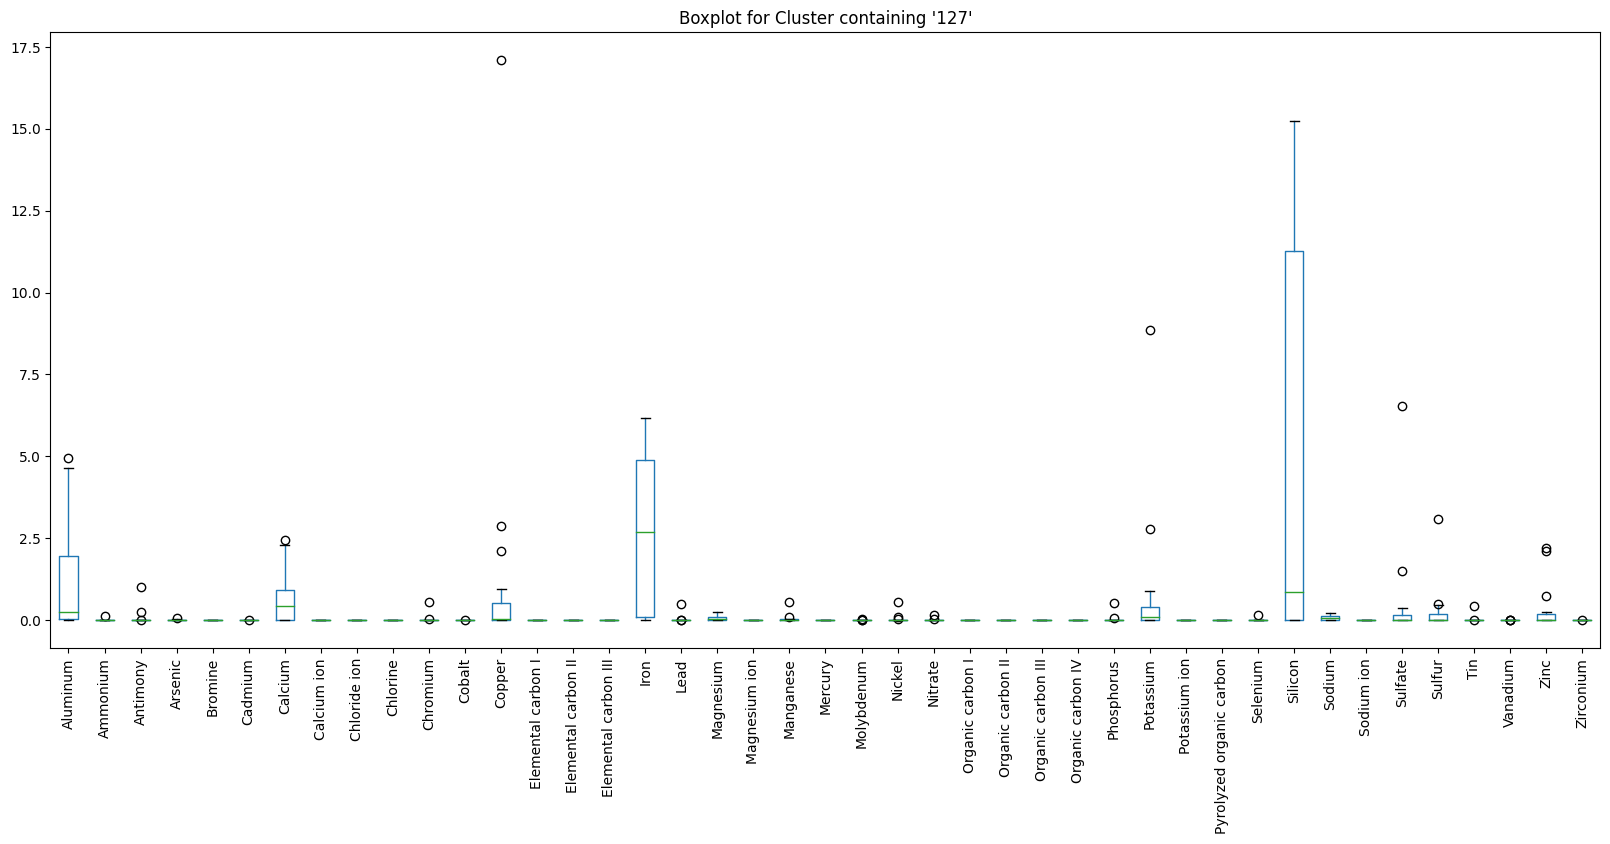

In [160]:
ax = selected_rows.iloc[:, 2:45].boxplot(figsize=(20, 8), grid=False)  # grid=False removes grid
ax.grid(False)

plt.title(f"Boxplot for Cluster containing '{elem}'")
plt.xticks(rotation=90)  # Rotate x-labels if needed
plt.show()

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD, NMF

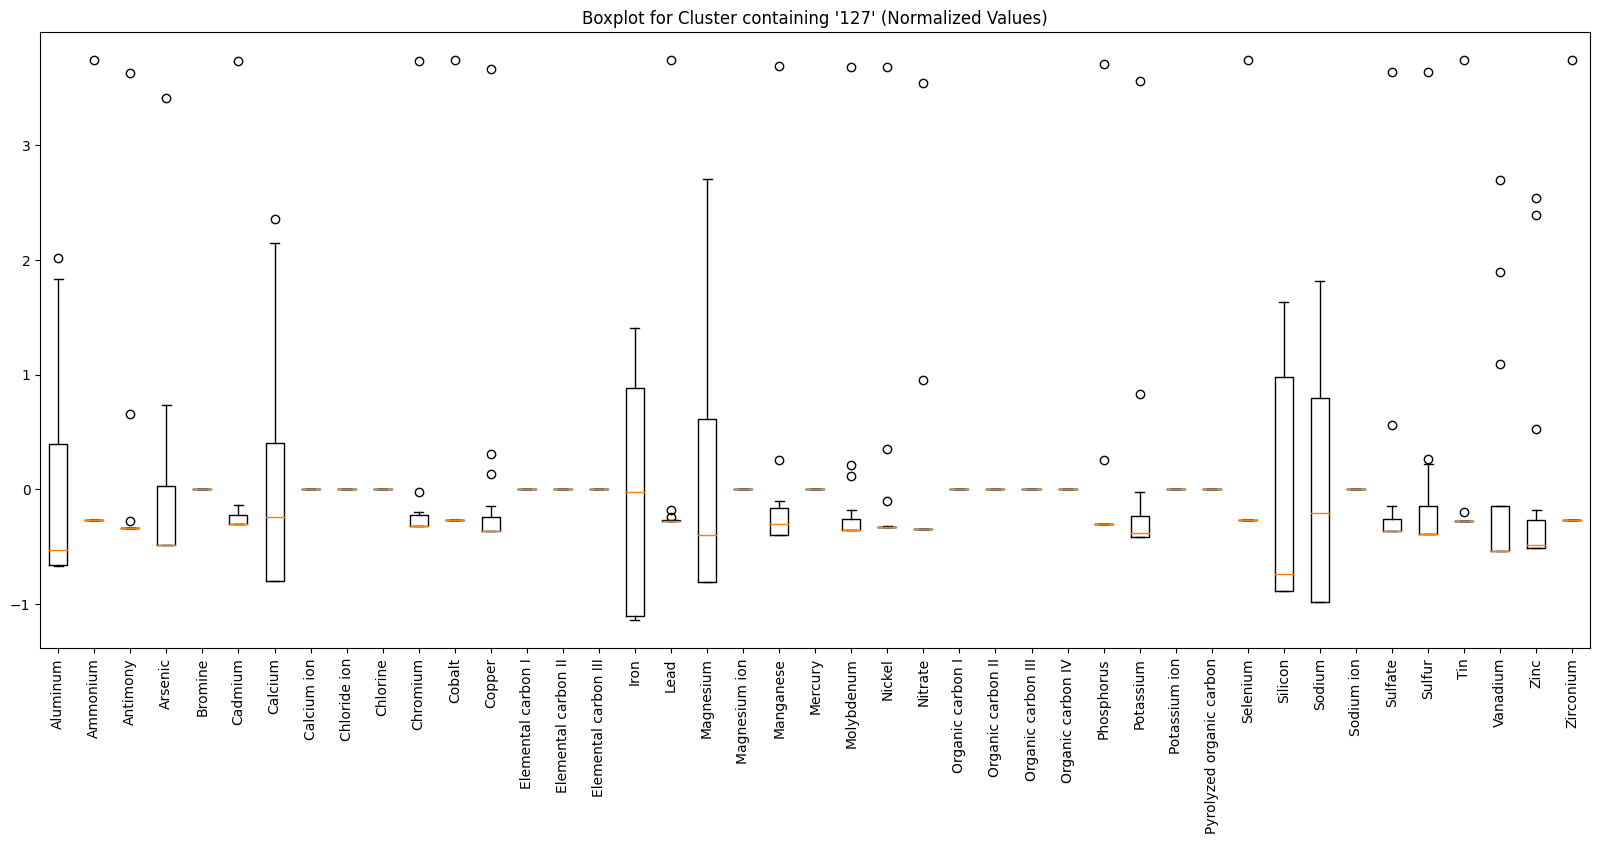

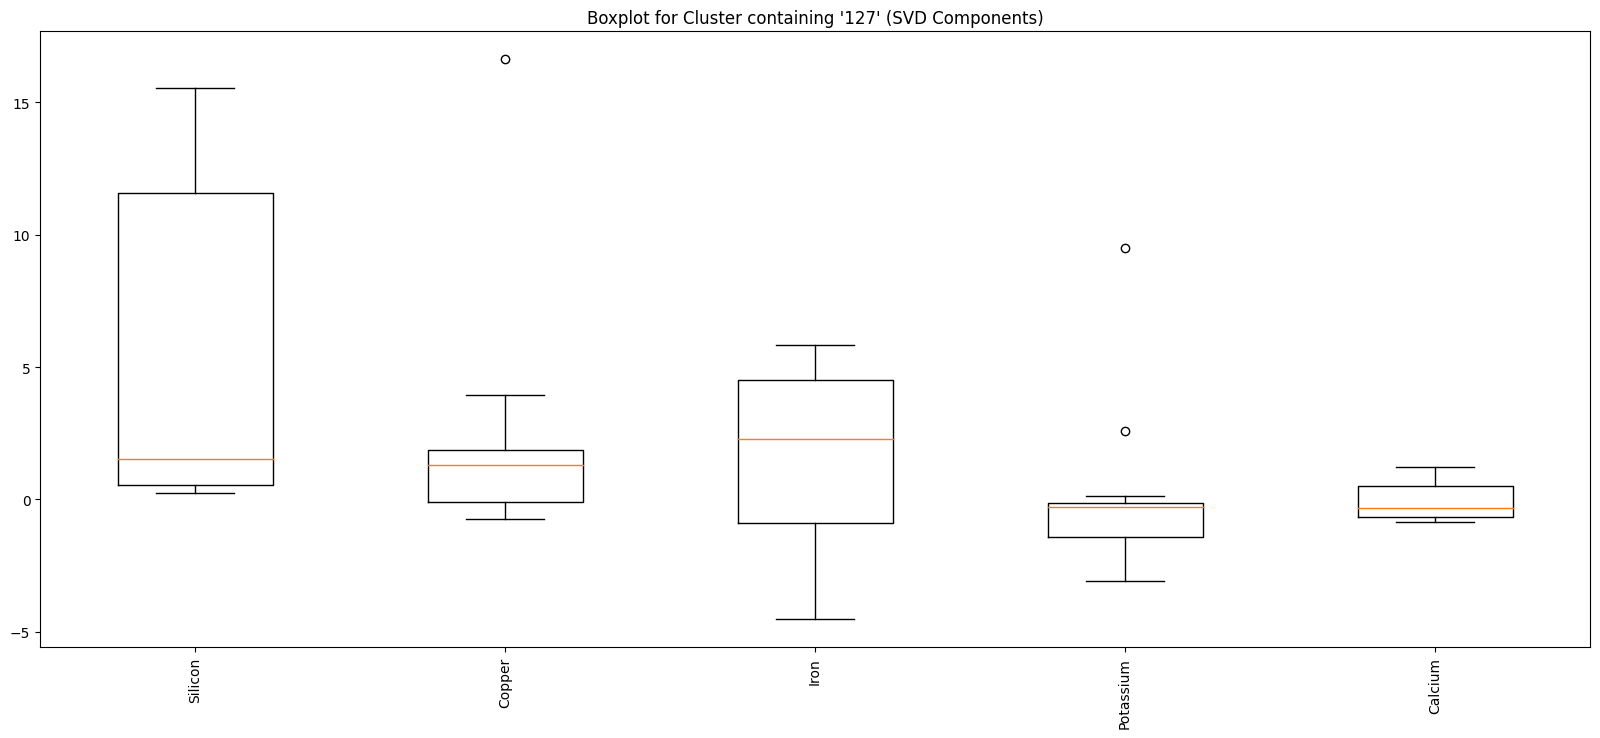

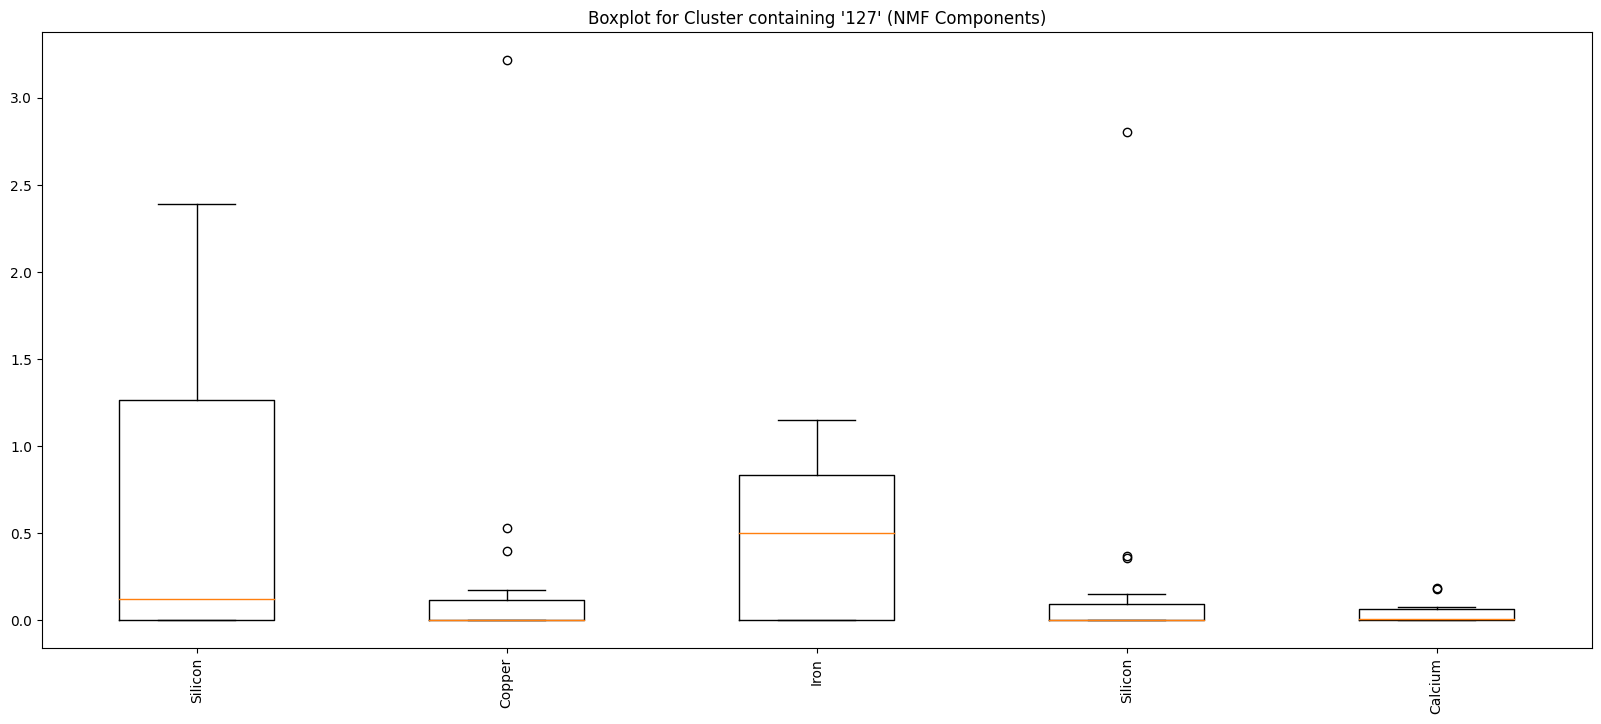

In [161]:
# Normalize the values
scaler = StandardScaler()
normalized_data = scaler.fit_transform(selected_rows.iloc[:, 2:45])

# Create the first box plot with normalized values
fig, ax = plt.subplots(figsize=(20, 8))
ax.boxplot(normalized_data)
ax.grid(False)
ax.set_xticklabels(selected_rows.columns[2:45], rotation=90)
plt.title(f"Boxplot for Cluster containing '{elem}' (Normalized Values)")
plt.xticks(rotation=90)
plt.show()

# Use SVD to find important components
svd = TruncatedSVD(n_components=5)
svd_data = svd.fit_transform(selected_rows.iloc[:, 2:45])

# Get the most important columns based on SVD components
important_columns_svd = selected_rows.columns[2:45][svd.components_.argmax(axis=1)]

# Create the second box plot with SVD components
fig, ax = plt.subplots(figsize=(20, 8))
ax.boxplot(svd_data)
ax.grid(False)
plt.title(f"Boxplot for Cluster containing '{elem}' (SVD Components)")
ax.set_xticklabels(important_columns_svd, rotation=90)
plt.show()

# Use NMF to find important components
nmf = NMF(n_components=5)
nmf_data = nmf.fit_transform(selected_rows.iloc[:, 2:45])

# Get the most important columns based on NMF components
important_columns_nmf = selected_rows.columns[2:45][nmf.components_.argmax(axis=1)]

# Create the third box plot with NMF components
fig, ax = plt.subplots(figsize=(20, 8))
ax.boxplot(nmf_data)
ax.grid(False)
plt.title(f"Boxplot for Cluster containing '{elem}' (NMF Components)")
ax.set_xticklabels(important_columns_nmf, rotation=90)
plt.show()


In [159]:
# # Initialize NMF and fit to the data
# model = NMF(n_components=2, init='random', random_state=0)
# W = model.fit_transform(X)
# H = model.components_

# # Visualize the data
# plt.scatter(W[:, 0], W[:, 1], c=y)
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.title('NMF Components')
# plt.colorbar()
# plt.show()